<a href="https://colab.research.google.com/github/marinavillaschi/englishportfolio_datascience_mpv/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Default Prediction**

*by [Marina Villaschi](https://www.linkedin.com/in/marinavillaschi/?locale=en_US)*

<center><img width="80%" src="http://images.unsplash.com/photo-1607863680198-23d4b2565df0?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max"></center>


<center>Photo by <a href="https://unsplash.com/@andretaissin?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Andre Taissin</a> on <a href="https://unsplash.com/s/photos/coin-bank?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a><center>
 




Client default is a great challenge finance institutions face that can cause great loss. Being able to predict it is important so companies can save and avoid losses.

financial institutions -big banks and fintechs- are increasing the investment in AI and ML with the purpose of predicting default and as a result minimizing it.

> This project's task is to do that: to **predict credit card client default**.







In [81]:
# ignore warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# install pandas profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# random seed
np.random.seed(1)

## Collecting data

The *Default of Credit Card Clients Dataset* dataset used on this project was obtained from UCI Machine Learning Repository available on [kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). It contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card **clients in Taiwan from April 2005 to September 2005**.



### Acknowledgements

The original dataset is from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

Lichman, M. (2013). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml) . Irvine, CA: University of California, School of Information and Computer Science.



In [82]:
# importing csv file to a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/marinavillaschi/creditcard-default-pred/main/data/UCI_Credit_Card.csv')

## EDA

Once we have our dataset on a pandas dataframe we can get started on step one of any Machine Learning project which is the exploratory data analysis. We will get to know our data to be able to get insights from it.

### Features and entries


Let's take a look at:

* the size of the dataframe

In [83]:
# print the size of the dataframe
print("Entries:  ", df.shape[0], "\nFeatures: ", df.shape[1])

Entries:   30000 
Features:  25


* As primeiras entradas do dataframe



In [84]:
# print first 5 entries
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


* features names and types

In [85]:
# print features types
print("Features types:\n")
print(df.dtypes)

Features types:

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


* a feature description list

  * `ID`: ID of each client
  * `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit
  * `SEX`: Gender (1=male, 2=female)
  * `EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
  * `MARRIAGE`: Marital status (1=married, 2=single, 3=others)
  * `AGE`: Age in years
  * `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
  * `PAY_2`: Repayment status in August, 2005 (scale same as above)
  * `PAY_3`: Repayment status in July, 2005 (scale same as above)
  * `PAY_4`: Repayment status in June, 2005 (scale same as above)
  * `PAY_5`: Repayment status in May, 2005 (scale same as above)
  * `PAY_6`: Repayment status in April, 2005 (scale same as above)
  * `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
  * `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
  * `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
  * `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
  * `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
  * `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
  * `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
  * `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
  * `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
  * `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
  * `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
  * `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
  * `default.payment.next.month`: Default payment (1=yes, 0=no)

Some thing we need to do next:

* feature `ID` is basically an index and we can **drop it** as it doesn't bring any relevant info to our analysis;

* features `EDUCATION` and `MARRIAGE` are multiple categoric variables so we will need to **code them**;

* the same goes for features `PAY_0` to `PAY_6` so we will also **code them**;

* features `BILL_AMT1` to `BILL_AMT6` and `PAY_AMT1` to `PAY_AMT6` are type *float* and we don't need to change that for now;

* `default.payment.next.month` is our **target feature**.



Let's check the statistical summary for our numeric variables.

In [86]:
# print the statistical summary
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There's something weird about features `EDUCATION` and `MARRIAGE` where it shows `min=0` and 0 wasn't even an entry option according to our feature description list.

The same happens for features `PAY_0` to `PAY_6` that show `min=-2` and median=0 and none of these values were an entry option.

Let's plot some boxplots and check for outliers.


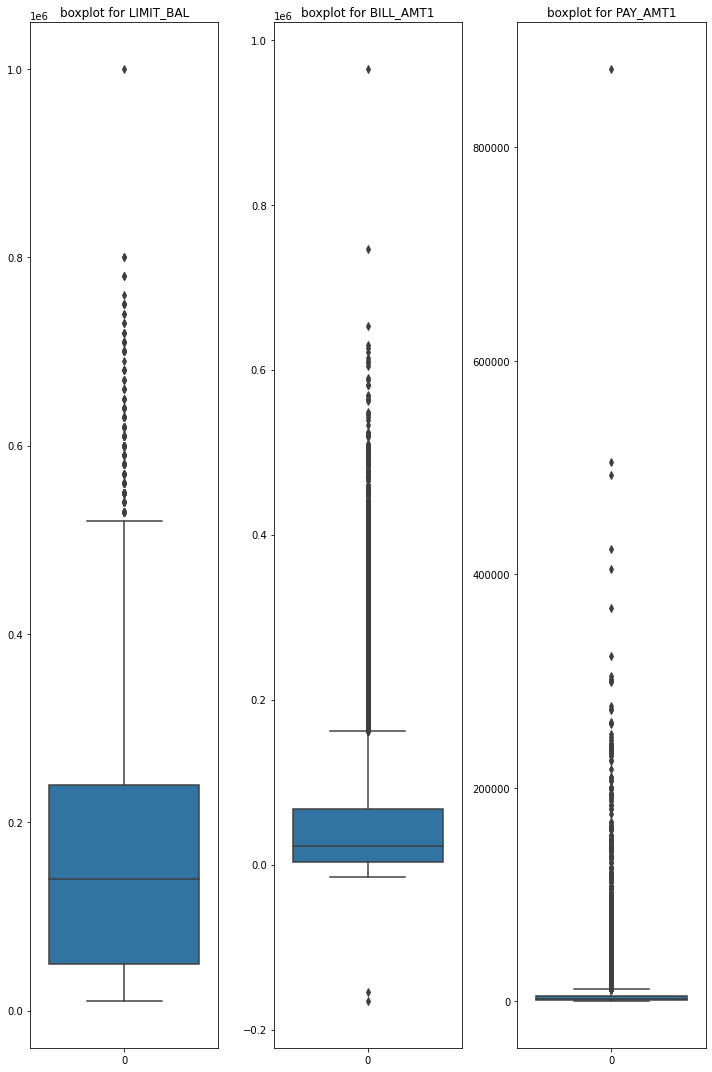

In [87]:
# plot boxplots for LIMIT_BAL, BILL_AMT1 and PAY_AMT1
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,15))
sns.boxplot(data=df.LIMIT_BAL, ax=ax1, orient="v")
sns.boxplot(data=df.BILL_AMT1, ax=ax2, orient="v")
sns.boxplot(data=df.PAY_AMT1, ax=ax3, orient="v")
ax1.set_title('boxplot for LIMIT_BAL')
ax2.set_title('boxplot for BILL_AMT1')
ax3.set_title('boxplot for PAY_AMT1')
plt.tight_layout()

There are some outlier values on `LIMIT_BAL`, `BILL_AMT1` and `PAY_AMT1`.

Let's drop some of them so out model is not biased by them.

Note that the behavior of `BILL_AMT1` will be used as baseline to treat the outliers of all `BILL_AMT1` to `BILL_AMT6` features.

The same goes for `PAY_AMT1` being a baseline for `PAY_AMT1` to `PAY_AMT6` features.


### Missing values

Let's take a look at the proportion of missing values in each column.


In [88]:
# checking missing values in each column
print("Missing values:\n")
print((df.isnull().sum()/df.shape[0]).sort_values())

Missing values:

ID                            0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
BILL_AMT1                     0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
default.payment.next.month    0.0
dtype: float64


Apparently all the columns show no missing value. That's great but kind of too good to be true, so let's take a deeper look and make sure we're not missing anything.

Let's check the unique values of each feature and see if it makes sense according to their description.

In [89]:
print("Unique values:\n")
print(df.nunique())

Unique values:

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64


Some categoric features seem off and here's why:

* according to the feature description, `EDUCATION` should have 6 unique values but it has 7;

* according to the feature description,`MARRIAGE` should have 3 unique values but it has 4;

* according to the feature description,`PAY_0` to `PAY_6` should have 10 unique values but some have 11.

Let's check how many of each unique values these features present.


In [90]:
# check unique values for EDUCATION and MARRIAGE
print("Unique values for EDUCATION:\n")
print(df.EDUCATION.value_counts())
print("\n\nUnique values for MARRIAGE:\n")
print(df.MARRIAGE.value_counts())

Unique values for EDUCATION:

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


Unique values for MARRIAGE:

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


There's 14 entries of value `0` on `EDUCATION` so we will replace them for `4` that means "other". Let's do that for both `5` and `6` entries that mean "unknown". All of these entries bring the same information so we will gather them all in `4` representing "other".

There's 54 entries of value `0` on `MARRIAGE` so we will replace them for `3` that means "other".



In [91]:
# check unique values for PAY_0 to PAY_6
print("\n\nUnique values for PAY_0:\n")
print(df.PAY_0.value_counts())
print("\n\nUnique values for PAY_2:\n")
print(df.PAY_2.value_counts())
print("\n\nUnique values for PAY_3:\n")
print(df.PAY_3.value_counts())
print("\n\nUnique values for PAY_4:\n")
print(df.PAY_4.value_counts())
print("\n\nUnique values for PAY_5:\n")
print(df.PAY_5.value_counts())
print("\n\nUnique values for PAY_6:\n")
print(df.PAY_6.value_counts())



Unique values for PAY_0:

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Unique values for PAY_2:

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Unique values for PAY_3:

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Unique values for PAY_4:

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64


Unique values for PAY_5:

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


Unique values for PAY_6:

 0    16286
-1     5740
-2     4895
 2     2766
 3    

`PAY_0` to `PAY_6` have lots of `0` entries and some `-2` entries.

Let's work with the idea that both these values (`0` and `-2`) mean that the bill has been payed with no delays which means we can group them all together with `-1` entries.

### Target feature distribution

Let's plot a countplot to understand how `default.payment.next.month` is distributed on the dataset.



0    23364
1     6636
Name: default.payment.next.month, dtype: int64


Default = 28.4 %




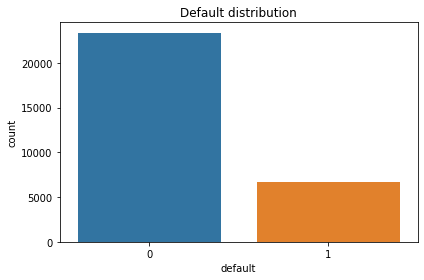

In [92]:
# check default.payment.next.month distribution
print(df['default.payment.next.month'].value_counts())
print('\n')
print('Default =', round(((df.loc[df['default.payment.next.month'] == 1].shape[0])/(df.loc[df['default.payment.next.month'] == 0].shape[0])*100),2),'%')
print('\n')

# plot countplot
fig, ax = plt.subplots()
sns.countplot(x=df['default.payment.next.month'], ax=ax)
ax.set_title('Default distribution')
ax.set_xlabel('default')
plt.tight_layout()

we have a **mild imbalancing** of the target feature `default.payment.next.month`

It is known that balanced data usually performs better for classification models. We will first train a model on the original distribuition to evaluate and if needed we will use a balancing method.



### Feature correlation

Let's take a look at the features correlations. We will create a correlation matrix for that and a heatmap for better visualization.

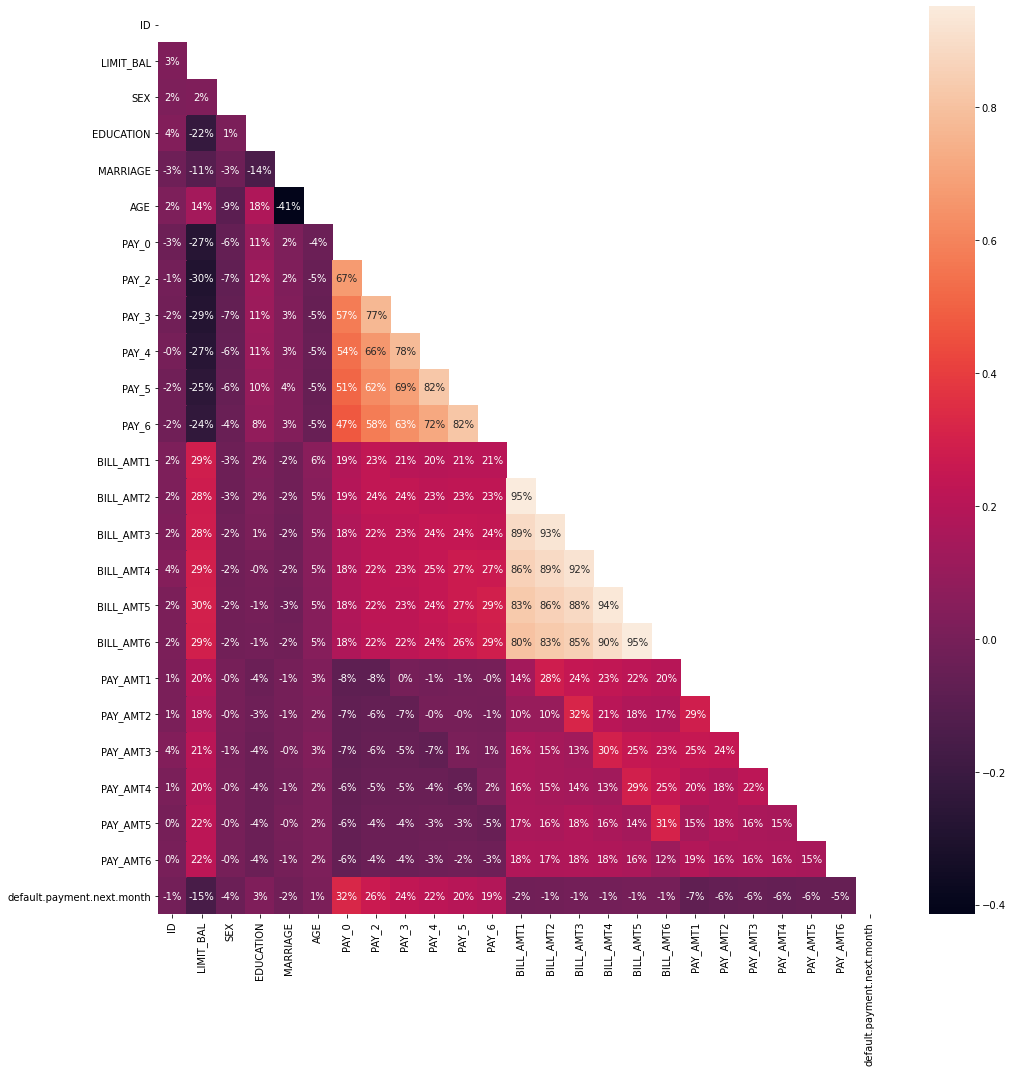

In [93]:
# plot correlation heatmap matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

The target feature doesn't show a very strong correlation to the other features. This could change after we standardize and balance our dataset.

Either way, we can come to some points:
* `PAY_0` to `PAY_6` show some positive correlation with the target feature as well as with one another. It makes sense because the payment status can influence the default chances;

* as expected `LIMIT_BAL` shows positive correlations with `BILL_AMT1`;

* `BILL_AMT1` to `BILL_AMT6` are also positively correlated with one another and it makes sense as the bill amount tends to stay the same.


## Preprocessing data

From the EDA we were able to identify the following steps that need to be done in data preprocessing:

* **Data cleaning** by grouping entries and dropping some outliers;

* **Feature selecting** the relevant ones and dropping the less relevant ones as well as grouping similar columns;

* **Coding** categorical features;

* **Splitting** the dataset into train and test sets.


### Data cleaning

As explained before, let's group some entries on features `EDUCATION`, `MARRIAGE` and `PAY_0` to `PAY_6`.

In [94]:
# making a copy of the dataframe
df_clean = df.copy()

# replacing 0, 5 and 6 entries for 4 on EDUCATION
df_clean.loc[df_clean.EDUCATION == 0, 'EDUCATION'] = 4
df_clean.loc[df_clean.EDUCATION == 5, 'EDUCATION'] = 4
df_clean.loc[df_clean.EDUCATION == 6, 'EDUCATION'] = 4

# replacing 0 entries for 3 on MARRIAGE
df_clean.loc[df_clean.MARRIAGE == 0, 'MARRIAGE'] = 3

# replacing 0 and -2 entries for -1 on PAY_0 to PAY_6
df_clean.loc[df_clean.PAY_0 <= 0, 'PAY_0'] = -1
df_clean.loc[df_clean.PAY_2 <= 0, 'PAY_2'] = -1
df_clean.loc[df_clean.PAY_3 <= 0, 'PAY_3'] = -1
df_clean.loc[df_clean.PAY_4 <= 0, 'PAY_4'] = -1
df_clean.loc[df_clean.PAY_5 <= 0, 'PAY_5'] = -1
df_clean.loc[df_clean.PAY_6 <= 0, 'PAY_6'] = -1

# check the new unique values after cleaning
print("Unique values for EDUCATION after cleaning:\n")
print(df_clean.EDUCATION.value_counts())
print("\n\nUnique values for MARRIAGE after cleaning:\n")
print(df_clean.MARRIAGE.value_counts())
print("\n\nUnique values for PAY_0 after cleaning:\n")
print(df_clean.PAY_0.value_counts())
print("\n\nUnique values for PAY_2 after cleaning:\n")
print(df_clean.PAY_2.value_counts())
print("\n\nUnique values for PAY_3 after cleaning:\n")
print(df_clean.PAY_3.value_counts())
print("\n\nUnique values for PAY_4 after cleaning:\n")
print(df_clean.PAY_4.value_counts())
print("\n\nUnique values for PAY_5 after cleaning:\n")
print(df_clean.PAY_5.value_counts())
print("\n\nUnique values for PAY_6 after cleaning:\n")
print(df_clean.PAY_6.value_counts())

Unique values for EDUCATION after cleaning:

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


Unique values for MARRIAGE after cleaning:

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64


Unique values for PAY_0 after cleaning:

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


Unique values for PAY_2 after cleaning:

-1    25562
 2     3927
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


Unique values for PAY_3 after cleaning:

-1    25787
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


Unique values for PAY_4 after cleaning:

-1    26490
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64


Unique values for PAY_5 after cleaning:

-1    27032
 2     262

Let's drop some outlier values.

we will drop the following entry values:
* values over 700000 on `LIMIT_BAL`;
* values over 500000 and under -100000 on `BILL_AMT1` to `BILL_AMT6`;
* values over 250000 on `PAY_AMT1` to `PAY_AMT6`.





In [95]:
# drop outlier values
df_clean.drop(df_clean[df_clean.LIMIT_BAL >= 700000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT1 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT2 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT3 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT4 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT5 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT6 >= 500000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT1 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT2 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT3 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT4 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT5 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.BILL_AMT6 <= -100000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT1 >= 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT2 >= 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT3 >= 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT4 >= 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT5 >= 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.PAY_AMT6 >= 250000].index, axis=0, inplace=True)

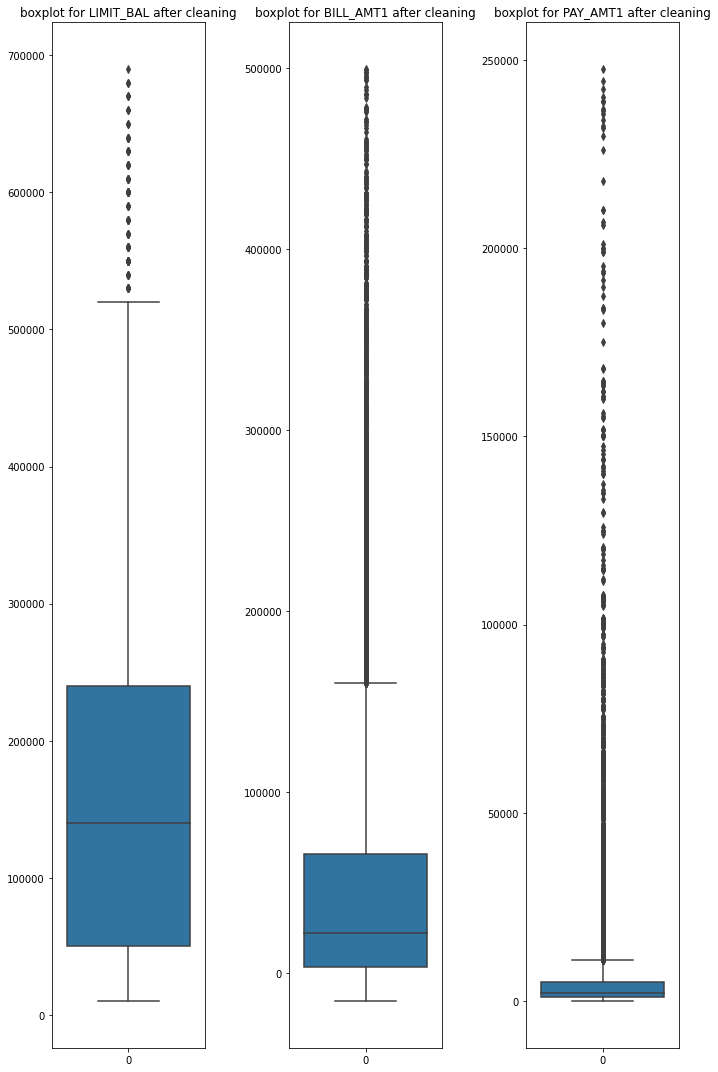

In [96]:
# plot the new boxplots for LIMIT_BAL, BILL_AMT1 e PAY_AMT1
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,15))
sns.boxplot(data=df_clean.LIMIT_BAL, ax=ax1, orient="v")
sns.boxplot(data=df_clean.BILL_AMT1, ax=ax2, orient="v")
sns.boxplot(data=df_clean.PAY_AMT1, ax=ax3, orient="v")
ax1.set_title('boxplot for LIMIT_BAL after cleaning')
ax2.set_title('boxplot for BILL_AMT1 after cleaning')
ax3.set_title('boxplot for PAY_AMT1 after cleaning')
plt.tight_layout()

### Feature selection

Let's go ahead and drop `ID` as it's not relevant for building our model.

Let's group `BILL_AMT1` to `BILL_AMT6` in a new feature `TOTAL_BILL` that will be the sum of them, meaning the total bill amount for the analysed time period (from April til September 2005).

Similarly let's group `PAY_AMT1` to `PAY_AMT6` in a new feature `TOTAL_PAY` that will be the sum of them, meaning the total pay amount for the analysed time period (from April til September 2005).

In [97]:
# drop ID
df_clean.drop('ID', axis=1, inplace=True)

# create features by grouping the other features
df_clean['TOTAL_BILL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']
df_clean['TOTAL_PAY'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']
df_clean.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=True)

# check the columns after feature selection
print("Final columns:\n")
print(df_clean.info())

Final columns:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29803 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29803 non-null  float64
 1   SEX                         29803 non-null  int64  
 2   EDUCATION                   29803 non-null  int64  
 3   MARRIAGE                    29803 non-null  int64  
 4   AGE                         29803 non-null  int64  
 5   PAY_0                       29803 non-null  int64  
 6   PAY_2                       29803 non-null  int64  
 7   PAY_3                       29803 non-null  int64  
 8   PAY_4                       29803 non-null  int64  
 9   PAY_5                       29803 non-null  int64  
 10  PAY_6                       29803 non-null  int64  
 11  default.payment.next.month  29803 non-null  int64  
 12  TOTAL_BILL                  29803 non-null  float64
 13  TOTAL_PAY      

Let's plot a new correlation matrix heatmap and see how it looks after all this cleaning.

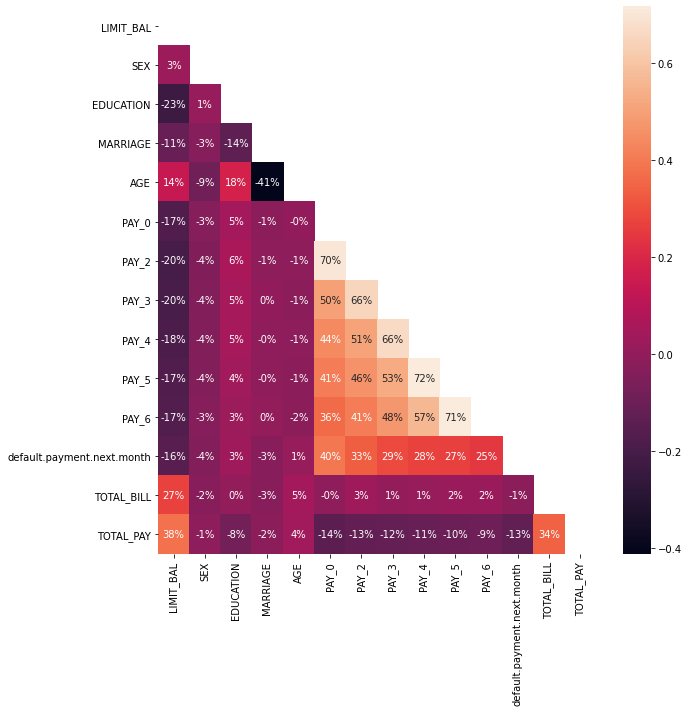

In [98]:
# plot new correlation heatmap matrix
corr_clean = df_clean.corr()
mask = np.triu(np.ones_like(corr_clean, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_clean, mask=mask, fmt='.0%', annot=True)
plt.tight_layout()

There was an increase in the correlation between `PAY_0` to `PAY_6` and the target feature. 

### Feature coding

Let's code `EDUCATION`, `MARRIAGE` and `PAY_0` to `PAY_6` with `get_dummies`.

In [99]:
# make a copy of df_clean
df_prep = df_clean.copy()

# code with get_dummies
df_prep = pd.get_dummies(df_prep, columns=['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

# check how it looks afterwards
df_prep.head()

,LIMIT_BAL,SEX,AGE,default.payment.next.month,TOTAL_BILL,TOTAL_PAY,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,2,24,1,7704.0,689.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000.0,2,26,1,17077.0,5000.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.0,2,34,0,101653.0,11018.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000.0,2,37,0,231334.0,8388.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000.0,1,57,0,109339.0,59049.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We're all set now!

### Dataset splitting

Let's split our dataset into train and test sets. The test set will only be used at the very end of the process.

In [100]:
# split into feature matrix (X) and target vector (y)
X = df_prep.drop('default.payment.next.month', axis=1)
y = df_prep['default.payment.next.month']

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

# check the size after splitting
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (22352, 56)
y_train size: (22352,)
X_test size: (7451, 56)
y_test size: (7451,)


## Machine Learning Models

Let's run some tests to pick the final model.

As a project premise we'll be taking **recall** and **F-1 score** as metrics and here's why we made this call:

The goal here is to predict default and for that we want the highest *true positives* (true=1, predicted=1) and the lowest *false negatives* (true=1, predicted=0). On the other hand it's not that big of a deal if we have some *false positives* (true=0, predicted=1) as it won't be as costy for the company. With that in mind, the model's accuracy is not our main concern here.


### Scaling and balancing

Let's create a baseline model using StandardScaler and unbalanced data.

After that we will run tests using 2 scaler techniques (`StandardScaler` e `MinMaxScaler`) and 2 balancing techniques (`RandomUnderSampler` e `SMOTE`) so we can see which pair works best.

We will use the **Logistic Regression** model to run the tests.

**Baseline - StandardScaler + unbalanced data**

In [101]:
# scale with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss = scaler.transform(X_train)

# define the baseline model
from sklearn.linear_model import LogisticRegression
bl_model = LogisticRegression(random_state=1, max_iter=500)

# cross-validation
from sklearn.model_selection import cross_val_score
score_r0 = cross_val_score(bl_model, X_train_ss, y_train, cv=5, scoring='recall')
print("Baseline:\nRecall: %0.2f (+/-%0.2f)" %(score_r0.mean(), score_r0.std()*2))
score_f0 = cross_val_score(bl_model, X_train_ss, y_train, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f0.mean(), score_f0.std()*2))

Baseline:
Recall: 0.35 (+/-0.02)
F-1 score: 0.46 (+/-0.02)


**Test 1 - StandardScaler + RandomUnderSampler**

In [102]:
# scale with RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
X_train_1, y_train_1 = RandomUnderSampler().fit_sample(X_train_ss, y_train)

# cross-validation
score_r1 = cross_val_score(bl_model, X_train_1, y_train_1, cv=5, scoring='recall')
print("Test 1: StandardScaler + RandomUnderSampler\nRecall: %0.2f (+/-%0.2f)" %(score_r1.mean(), score_r1.std()*2))
score_f1 = cross_val_score(bl_model, X_train_1, y_train_1, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f1.mean(), score_f1.std()*2))

Test 1: StandardScaler + RandomUnderSampler
Recall: 0.56 (+/-0.02)
F-1 score: 0.65 (+/-0.01)


**Test 2 - StandardScaler + SMOTE**

In [103]:
# balance with SMOTE
from imblearn.over_sampling import SMOTE
X_train_2, y_train_2 = SMOTE().fit_sample(X_train_ss,y_train)

#cross-validatio
score_r2 = cross_val_score(bl_model, X_train_2, y_train_2, cv=5, scoring='recall')
print("Test 2: StandardScaler + SMOTE\nRecall: %0.2f (+/-%0.2f)" %(score_r2.mean(), score_r2.std()*2))
score_f2 = cross_val_score(bl_model, X_train_2, y_train_2, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f2.mean(), score_f2.std()*2))

Test 2: StandardScaler + SMOTE
Recall: 0.56 (+/-0.01)
F-1 score: 0.65 (+/-0.01)


**Test 3 - MinMaxScaler + RandomUnderSampler**

In [104]:
# scale with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(X_train)
X_train_mm = minmax.transform(X_train)

# balance with RandomUnderSampler
X_train_3, y_train_3 = RandomUnderSampler().fit_sample(X_train_mm, y_train)

#cross-validation
score_r3 = cross_val_score(bl_model, X_train_3, y_train_3, cv=5, scoring='recall')
print("Test 3: MinMaxScaler + RandomUnderSampler\nRecall: %0.2f (+/-%0.2f)" %(score_r3.mean(), score_r3.std()*2))
score_f3 = cross_val_score(bl_model, X_train_3, y_train_3, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f3.mean(), score_f3.std()*2))

Test 3: MinMaxScaler + RandomUnderSampler
Recall: 0.56 (+/-0.02)
F-1 score: 0.65 (+/-0.02)


**Test 4 - MinMaxScaler + SMOTE**

In [105]:
# balance with SMOTE
X_train_4, y_train_4 = SMOTE().fit_sample(X_train_mm,y_train)

# cross-validation
score_r4 = cross_val_score(bl_model, X_train_4, y_train_4, cv=5, scoring='recall')
print("Test 4: MinMaxScaler + SMOTE\nRecall: %0.2f (+/-%0.2f)" %(score_r4.mean(), score_r4.std()*2))
score_f4 = cross_val_score(bl_model, X_train_4, y_train_4, cv=5, scoring='f1')
print("F-1 score: %0.2f (+/-%0.2f)" %(score_f4.mean(), score_f4.std()*2))

Test 4: MinMaxScaler + SMOTE
Recall: 0.56 (+/-0.02)
F-1 score: 0.65 (+/-0.01)


There was a great improvement from the baseline model to the test 1 model but the difference between the tests (1 to 4) wasn't as relevant.

We will take the pair tested on **test 4**: `MinMaxScaler` + `SMOTE`.

Let's plot a new countplot to see the balanced distribution.


1    17403
0    17403
dtype: int64


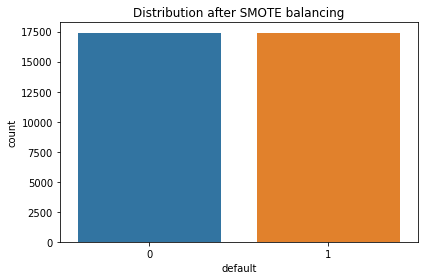

In [106]:
# define X_train_final and y_train_final
X_train_final = X_train_4
y_train_final = y_train_4

# scaling the test set
X_test = minmax.transform(X_test)

# check the new distribution
print(pd.Series(y_train_final).value_counts())

# plot the new countplot
fig, ax = plt.subplots()
sns.countplot(y_train_final)
ax.set_title('Distribution after SMOTE balancing')
ax.set_xlabel('default')
plt.tight_layout()

In [107]:
# check the size of final sets
print('X_train_final size:', X_train_final.shape)
print('y_train_final size:', y_train_final.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train_final size: (34806, 56)
y_train_final size: (34806,)
X_test size: (7451, 56)
y_test size: (7451,)


### Choosing the models

Let's do a cross-validation to train some classification models so we can evaluate their performance (using the `recall` and `f1-score` metric) and then pick the most suitable one(s).

The models we will train are:

* Random Forest
* Decision Tree
* SGD
* SVC
* XGBoost
* LGBM

In [108]:
# define the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# cross-validation to evaluate recall and f1-score
model = []
recall = []
f1 = []

for clf in (rf, dt, sgdc, svc, xgb, lgbm):
  model.append(clf.__class__.__name__)
  scores_r = cross_val_score(clf, X_train_final, y_train_final, cv=5, scoring='recall')
  recall.append(scores_r.mean())
  scores_f = cross_val_score(clf, X_train_final, y_train_final, cv=5, scoring='f1')
  f1.append(scores_f.mean())
  data = list(zip(recall, f1))

pd.DataFrame(data=data, index=model, columns=['Recall', 'F-1 Score'])

,Recall,F-1 Score
RandomForestClassifier,0.826526,0.830800
DecisionTreeClassifier,0.761079,0.754226
SGDClassifier,0.513417,0.618571
SVC,0.606850,0.673227
XGBClassifier,0.658395,0.732586
LGBMClassifier,0.770276,0.806885


### Modelo 1 - Random Forest

Random Forest model had the best performance on the training set so let's train it and evaluate it on the test set.

Relatório de classificação - modelo 1:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5801
           1       0.50      0.51      0.50      1650

    accuracy                           0.78      7451
   macro avg       0.68      0.68      0.68      7451
weighted avg       0.78      0.78      0.78      7451

AUC: 0.6816



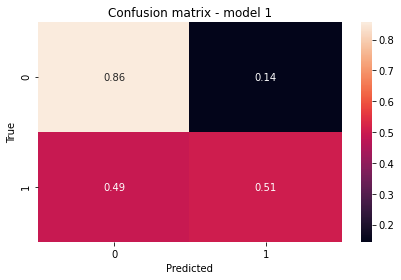

In [109]:
from sklearn.ensemble import RandomForestClassifier

# define model 1
model_1 = RandomForestClassifier(random_state=1)

# train model 1
model_1.fit(X_train_final, y_train_final)

# make predictions on the test set
y_pred_1 = model_1.predict(X_test)

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# print classification report
print("Relatório de classificação - modelo 1:")
print(classification_report(y_test, y_pred_1))

# print AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_1)))

# plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_1, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion matrix - model 1")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.tight_layout()

The Random Forest model wasn't able to generalize well on the test set.

Let's try another model.

### Modelo 2 - SVC

Relatório de classificação - modelo 2:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      5801
           1       0.48      0.59      0.53      1650

    accuracy                           0.77      7451
   macro avg       0.68      0.70      0.69      7451
weighted avg       0.79      0.77      0.78      7451

AUC: 0.7025



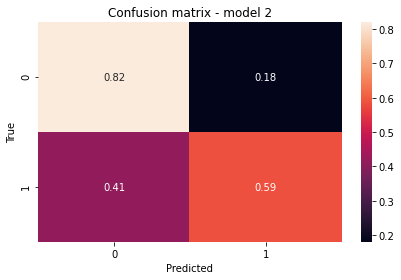

In [110]:
from sklearn.svm import SVC

# define model 2
model_2 = SVC(C=1.5, random_state=1)

# train model 2
model_2.fit(X_train_final, y_train_final)

# make predictions on the test set
y_pred_2 = model_2.predict(X_test)

# print classification report
print("Relatório de classificação - modelo 2:")
print(classification_report(y_test, y_pred_2))

# print AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_2)))

# plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_2, normalize='true'), annot=True, ax=ax)
ax.set_title("Confusion matrix - model 2")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")
plt.tight_layout()

## Wrapping up

We have completed all the steps of a Machine Learning problem.

We saw that the model trained on unbalanced data didn't have a good performance as we already expected. That reinforces the **importance of balancing the dataset for classification models**. There was a good improvement of the model using one of the 4 pairs of scaling and balancing techniques tested although all of them had very similar performances.

The tree based models performed well on the test set but Random Forest didn't generalize well for test data.


**SVC** was the final model. It showed similar performance on both train and test sets so it generalized well enough showing a **realistic and right performance**.